## The Android App Market on Google Play





## Project Description

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this project, you will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. You'll look for insights in the data to devise strategies to drive growth and retention. The data for this project was scraped from the Google Play website. While there are many popular datasets for Apple App Store, there aren't many for Google Play apps, which is partially due to the increased difficulty in scraping the latter as compared to the former. The data files are as follows:

    apps.csv : contains all the details of the apps on Google Play. These are the features that describe an app.
    user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed, passed through a sentiment analyzer engine and tagged with its sentiment score.


## Guided Project

Through a series of guided steps, harness your complete data analyst toolbox to perform data wrangling, create visualizations, and carry out a descriptive and inferential analysis.

## Project Tasks

    1. Google Play Store apps and reviews
    2. Data cleaning
    3. Correcting data types
    4. Exploring app categories
    5. Distribution of app ratings
    6. Size and price of an app
    7. Relation between app category and app price
    8. Filter out "junk" apps
    9. Popularity of paid apps vs free apps
    10. Sentiment analysis of user reviews

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.


Let's take a look at the data, which consists of two files:

    apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.
    user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.


In [45]:
import pandas as pd

#print(help(pd.DataFrame.drop_duplicates))

In [46]:
import pandas as pd


# # Read in dataset
#####################################################################################################################
apps = pd.read_csv('apps.csv')
#print(apps.head(3))
print('\n')

reviews = pd.read_csv('user_reviews.csv')
#print(reviews.head())



# Drop duplicates
#####################################################################################################################
print('before apps.drop_duplicate, ' + str(len(apps)))
apps = apps.drop_duplicates()
print('after apps.drop_duplicate, ' + str(len(apps)))

print('before reviews.drop_duplicate, ' + str(len(reviews)))
reviews = reviews.drop_duplicates()
print('after reviews.drop_duplicate, ' + str(len(reviews)))

print('\n')


# Have a look at a random sample of 5 rows
#####################################################################################################################
print(apps.sample(5))


# By default, it drop_duplicate rows based on all columns.  all column value of one row equal to another row
# To remove duplicates on specific column(s), use 'subset=col_name'.  drop rows if subset columns value are same 




before apps.drop_duplicate, 9659
after apps.drop_duplicate, 9659
before reviews.drop_duplicate, 64295
after reviews.drop_duplicate, 30679


      Unnamed: 0                         App         Category  Rating  \
4751        5735  AW Screen Recorder No Root    VIDEO_PLAYERS     4.3   
4891        5878                AZ PLAYER HD            TOOLS     3.2   
3705        4619   Don't Starve: Shipwrecked             GAME     4.1   
7993        9112        Files To SD Card Pro            TOOLS     4.2   
4856        5841   Ay Yıldız Duvar Kağıtları  PERSONALIZATION     NaN   

      Reviews  Size  Installs  Type  Price Content Rating  \
4751     1659  3.7M  100,000+  Free      0       Everyone   
4891       24  4.7M   10,000+  Free      0       Everyone   
3705     1468  4.9M   10,000+  Paid  $4.99           Teen   
7993      994  2.8M  100,000+  Free      0       Everyone   
4856        3  6.5M      100+  Free      0       Everyone   

                       Genres       Last Updated Cur

## 2. Data cleaning

The three features that we will be working with most frequently henceforth are Installs, Size, and Price. A careful glance of the dataset reveals that some of these columns mandate data cleaning in order to be consumed by code we'll write later. Specifically, the presence of special characters (, $ +) and letters (M k) in the Installs, Size, and Price columns make their conversion to a numerical data type difficult. Let's clean by removing these and converting each column to a numeric type.


In [3]:
print(help(str.replace))
#print('\n')

#print(help(pd.to_numeric))

Help on method_descriptor:

replace(self, old, new, count=-1, /)
    Return a copy with all occurrences of substring old replaced by new.
    
      count
        Maximum number of occurrences to replace.
        -1 (the default value) means replace all occurrences.
    
    If the optional argument count is given, only the first count occurrences are
    replaced.

None


In [10]:
# List of characters to remove
characters = [',', '$', '+', 'M', 'k']

# List of column names to clean
columns = ['Installs', 'Size', 'Price']
print(type(apps['Size'][32]))

for i in columns:
    for c in characters:
        apps[i] = apps[i].str.replace(c, '', regex=True)
        #############################################################################################################
        
    apps[i] = pd.to_numeric(apps[i])


print(apps.sample(5))

print(type(apps['Price'][12]))
print(type(apps['Installs'][12]))
print(type(apps['Size'][32]))

<class 'str'>
      Unnamed: 0                             App             Category  Rating  \
5308        6316    BJ Bridge Acol Beginner 2018                 GAME     3.7   
9637       10819                       Fanfic-FR  BOOKS_AND_REFERENCE     3.3   
9387       10562                     FK Atlantas               SPORTS     1.5   
6722        7781  Counter Deck Calculator for CR                TOOLS     4.1   
8254        9378                     TAXI DRIVER               FAMILY     3.7   

      Reviews  Size  Installs  Type  Price Content Rating             Genres  \
5308       11   4.8      5000  Free    0.0       Everyone               Card   
9637       52   3.6      5000  Free    0.0           Teen  Books & Reference   
9387        2  26.0         5  Free    0.0       Everyone             Sports   
6722     3446  19.0    500000  Free    0.0       Everyone              Tools   
8254     7203  32.0   1000000  Free    0.0       Everyone         Simulation   

           Last Up

In [47]:
# List of characters to remove
characters = [',', '$', '+', 'M', 'k']

# List of column names to clean
columns = ['Installs', 'Size', 'Price']


# Loop for each column
for i in columns:
    # Replace each character with an empty string
    for j in characters:
        apps[i] = apps[i].str.replace(j, '', regex=True)

    # Convert col to numeric
    apps[i] = pd.to_numeric(apps[i])


print(apps.sample(5))


      Unnamed: 0                                                App  \
8079        9199                            EB-Chat – For my Events   
3944        4885                               5 Minute Ab Workouts   
2920        3677                                           Vote for   
1232        1520                                              Luffs   
2869        3626  The Weather Channel: Rain Forecast & Storm Alerts   

                Category  Rating  Reviews  Size  Installs  Type  Price  \
8079              EVENTS     NaN        2  21.0        10  Free    0.0   
3944  HEALTH_AND_FITNESS     4.6     2067   8.4     50000  Free    0.0   
2920       VIDEO_PLAYERS     4.2   193381  17.0  50000000  Free    0.0   
1232  LIBRARIES_AND_DEMO     NaN      487   3.7    100000  Free    0.0   
2869             WEATHER     4.4  1558437   NaN  50000000  Free    0.0   

     Content Rating                   Genres       Last Updated  \
8079           Teen                   Events  November 16, 20

## 3. Exploring app categories

With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.

This brings us to the following questions:

    Which category has the highest share of (active) apps in the market?
    Is any specific category dominating the market?
    Which categories have the fewest number of apps?

We will see that there are 33 unique app categories present in our dataset. Family and Game apps have the highest market prevalence. Interestingly, Tools, Business and Medical apps are also at the top.

                        Installs
Category                        
GAME                 13878924415
COMMUNICATION        11038276251
TOOLS                 8001771915
PRODUCTIVITY          5793091369
SOCIAL                5487867902
PHOTOGRAPHY           4649147655
FAMILY                4427941505
VIDEO_PLAYERS         3926902720
TRAVEL_AND_LOCAL      2894887146
NEWS_AND_MAGAZINES    2369217760
ENTERTAINMENT         2113660000
BOOKS_AND_REFERENCE   1665969576
PERSONALIZATION       1532494782
SHOPPING              1400348785
HEALTH_AND_FITNESS    1144022512
SPORTS                1096474498
BUSINESS               697164865
LIFESTYLE              503823539
MAPS_AND_NAVIGATION    503281890
FINANCE                455348734
WEATHER                361100520
EDUCATION              352952000
FOOD_AND_DRINK         211798751
DATING                 140926107
ART_AND_DESIGN         114338100
HOUSE_AND_HOME          97212461
AUTO_AND_VEHICLES       53130211
LIBRARIES_AND_DEMO      52995910
COMICS    

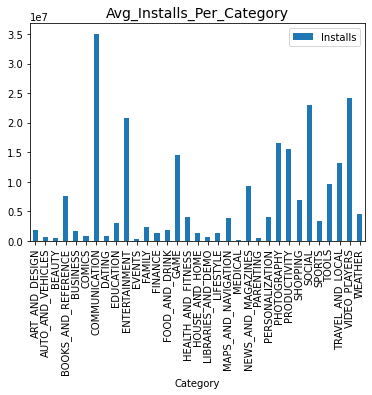

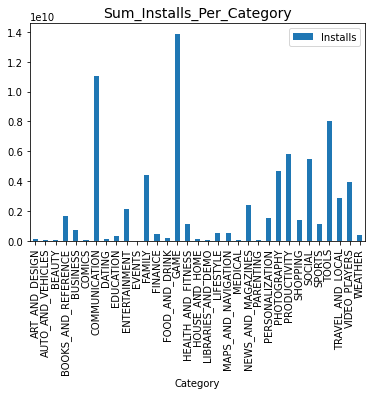

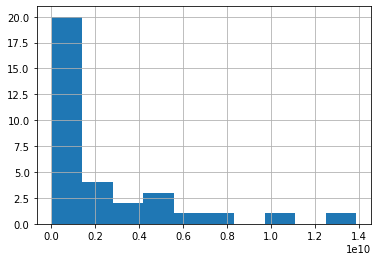

In [55]:
# Which category has the highest share of (active) apps in the market?

import matplotlib.pyplot as plt
import numpy as np

print(apps.pivot_table(values='Installs', 
                       index='Category', 
                       aggfunc=np.sum).sort_values('Installs', ascending=False))#.hist()
#plt.show()
# Which category has the highest share of (active) apps in the market?    Games, Communication, Tools
#####################################################################################################################


# Is any specific category dominating the market?   Destribution???   Market share
#####################################################################################################################


#                                                   , aggfunc=np.sum
apps.pivot_table(values='Installs', index='Category').plot(kind='bar')
plt.title('Avg_Installs_Per_Category', fontsize=14)
plt.show()


apps.pivot_table(values='Installs', index='Category', aggfunc=np.sum).plot(kind='bar')
plt.title('Sum_Installs_Per_Category', fontsize=14)
plt.show()


                                                      ###############################################################
apps.groupby('Category')['Installs'].sum().hist()     ### Understand what we want and image the outcome of code
plt.show()                                            ###############################################################

## 4. Distribution of app ratings

After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.

From our research, we found that the average volume of ratings across all app categories is 4.17. The histogram plot is skewed to the right indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

      Unnamed: 0                               App Category  Rating  Reviews  \
9104       10275                         Mobile FC   SPORTS     4.1     5015   
3749        4665                             SAY-U   FAMILY     3.2     1011   
4124        5074                  Gun Strike Shoot     GAME     4.1    94761   
3997        4939  AC Remote for Carrier - NOW FREE    TOOLS     3.7      163   
9199       10371              Angry Birds Space HD     GAME     4.5    43645   

      Size  Installs  Type  Price Content Rating         Genres  \
9104  57.0    100000  Free    0.0       Everyone         Sports   
3749   NaN    100000  Free    0.0           Teen  Entertainment   
4124  17.0  10000000  Free    0.0           Teen         Action   
3997  26.0     10000  Free    0.0       Everyone          Tools   
9199  46.0   5000000  Free    0.0       Everyone         Arcade   

           Last Updated         Current Ver   Android Ver  
9104       May 25, 2018                 125  4.0.3 and u

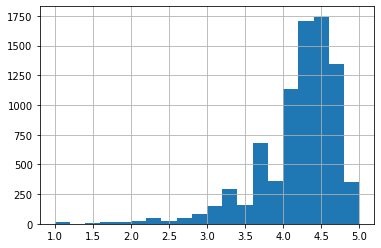

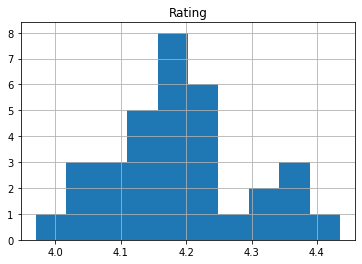

In [44]:
print(apps.sample(5))


print(apps.isna().sum())
print(apps['Rating'].mean())


# How all these apps perform on an average
import matplotlib.pyplot as plt

apps['Rating'].hist(bins=20)
plt.show()



import matplotlib.pyplot as plt
import numpy as np

apps.pivot_table(values='Rating', index='Category', aggfunc=np.mean).hist()
plt.show()